# Curriculum Logs Project

## Goal:
* Working as a team, acquire, prep, and explore the curriculum website logs to answer at least five questions as complete as possible.

## Imports

In [1]:
# standard imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns

# tools imports
import matplotlib.pyplot as plt

# functions .py imports
import wrangle as w
import explore as e

## Acquire

<div class="alert alert-block alert-info">

* Data acquired from __[Google .txt file](https://drive.google.com/file/d/1dWwP_4vqETIS2oMALU2mH3F6QQh1m8CT/view?usp=share_link)__
* Stripped text into 5 separate columns
* Added columns '____' to prepped data
* It contains 900,223 rows and 5 columns before cleaning
* Each row represents a single user access to a curriculum page
* Each column represents a detail about the user or page accessed and on which date

</div>

## Prepare

<div class="alert alert-block alert-info">

* Did not remove any columns
* Did not rename any columns
* Checked for nulls - removed one null missing 'endpoint'
* Filled all 'cohort' nulls with '0'
* Added features start_date, end_date, program_id

</div>

## Data Dictionary

| Feature   | Definition                                                                                                                     |
|-----------|--------------------------------------------------------------------------------------------------------------------------------|
| date      | the date and time a user accessed Codeup curriculum internet page                                                              |
| endpoint  | the page the user landed on in the curriculum                                                                                  |
| user_id   | the number assigned to a user by CodeUp (i.e. student, staff)                                                                  |
| cohort_id | the number assigned to a cohort in a program by CodeUp                                                                         |
| source_ip | Internet Protocol address, is a numerical label assigned to each device connected to a computer network that uses the Internet |

In [2]:
# acquire data
w.acquire_df()
df = w.prepare_df()

## A brief look at the prepared data

In [3]:
w.prepare_df()

,cohort_id,cohort_name,start_date,end_date,program_id,dates,time,endpoint,user_id,ip
0,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:55:03,/,1,97.105.19.61
1,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:02,java-ii,1,97.105.19.61
2,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61
3,8.0,Hampton,2015-09-22,2016-02-06,1.0,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61
4,22.0,Teddy,2018-01-08,2018-05-17,2.0,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61
...,...,...,...,...,...,...,...,...,...,...
900217,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:41:51,jquery/personal-site,64,71.150.217.33
900218,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:42:02,jquery/mapbox-api,64,71.150.217.33
900219,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:42:09,jquery/ajax/weather-map,64,71.150.217.33
900220,28.0,Staff,2014-02-04,2014-02-04,2.0,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,24.160.137.86


## A summary of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900222 entries, 0 to 900221
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   cohort_id    900222 non-null  float64       
 1   cohort_name  847329 non-null  object        
 2   start_date   847329 non-null  datetime64[ns]
 3   end_date     847329 non-null  datetime64[ns]
 4   program_id   847329 non-null  float64       
 5   dates        900222 non-null  datetime64[ns]
 6   time         900222 non-null  object        
 7   endpoint     900222 non-null  object        
 8   user_id      900222 non-null  int64         
 9   ip           900222 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 75.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cohort_id,900222.0,45.651338,33.800052,0.0,26.0,33.0,57.0,139.0
program_id,847329.0,2.086003,0.388230,1.0,2.0,2.0,2.0,4.0
user_id,900222.0,458.825565,249.296870,1.0,269.0,475.0,660.0,981.0


<div class="alert alert-block alert-info">
    
#### Programs Listed
* Program 1.0 = WebDev 1.0
* Program 2.0 = WebDev 2.0
* Program 3.0 = Data Science (Didn't start until 2019) 

</div>

# Explore

## Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<div class="alert alert-block alert-info">
    
#### Conditions on how we decided lessons from the endpoint?  (for questions 1 and 2)
1. It must contain a major chapter (ex: fundamentals, java i, methodologies i)
2. It must contain a '/' after the major chapter
3. It must contain a lesson following the '/'
4. The endpoint can't be from the appendix, table of contents, or be a file extension (ex: .jpeg, .json, .svg)

* Example: 'fundamentals/repositories, 'javascript-i/conditionals, 'java-iii/servlets', 'classification/explore'

</div>

In [6]:
# make dataframes for three programs in 'program_id'
df1, df2, df3 = e.get_program_id_df(df)

In [7]:
# look at lessons of WebDev 1.0
df1['endpoint'].value_counts().head(25)

/                                                                            1681
index.html                                                                   1011
javascript-i                                                                  736
html-css                                                                      542
spring                                                                        501
java-iii                                                                      479
java-ii                                                                       454
java-i                                                                        444
javascript-ii                                                                 429
appendix                                                                      409
jquery                                                                        344
mysql                                                                         284
content/html-css

In [8]:
# get count of hits of highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
1.0     71
2.0      0
4.0      0
5.0      0
6.0      0
7.0     24
8.0      9
11.0     1
12.0     0
13.0     4
14.0    57
17.0    65
19.0     1
Name: endpoint, dtype: int64

In [9]:
# get count of hits of second highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('java-iii/servlets').sum())

cohort_id
1.0     72
2.0      0
4.0      0
5.0      0
6.0      1
7.0      1
8.0     30
11.0     0
12.0     0
13.0     2
14.0    92
17.0    29
19.0     0
Name: endpoint, dtype: int64

In [10]:
# get count of hits of third highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/javascript-with-html').sum())

cohort_id
1.0     76
2.0      0
4.0      0
5.0      0
6.0      1
7.0     14
8.0      9
11.0     2
12.0     0
13.0     5
14.0    54
17.0    63
19.0     1
Name: endpoint, dtype: int64

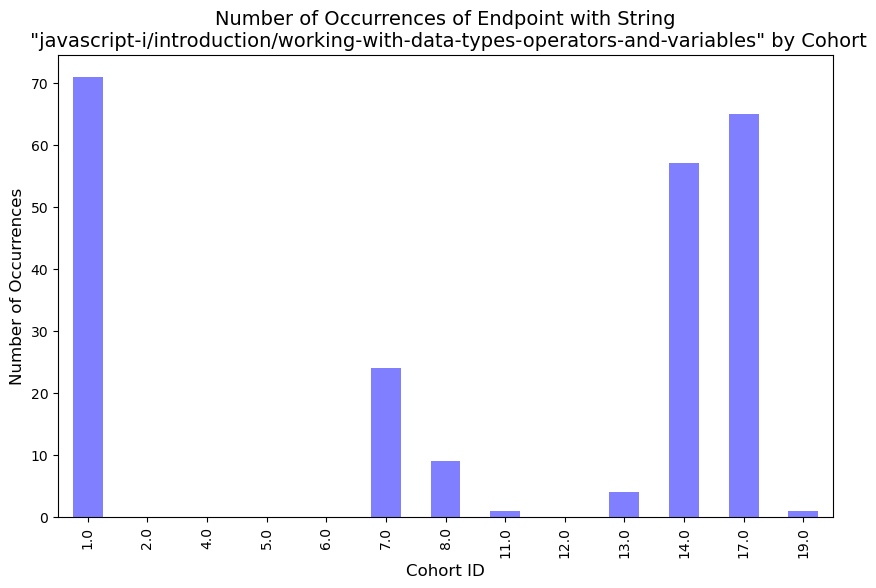

In [11]:
# selected highest hit endpoint to graph by cohort_id
e.plot_endpoints_counts(df1, 'javascript-i/introduction/working-with-data-types-operators-and-variables')

<div class="alert alert-block alert-info">

#### Takeaway
* WebDev 1.0's highest endpoint occurences is 'javascript i introduction', with 232 hits. The cohort's consistency never changed between lessons so we selected 'javascript i introduction' as most consistent.
    
</div>

In [12]:
# look at WebDev 2.0 endpoint hits
df2['endpoint'].value_counts().head(25)

/                                                                            35814
javascript-i                                                                 17457
toc                                                                          17428
search/search_index.json                                                     15212
java-iii                                                                     12683
html-css                                                                     12569
java-ii                                                                      11719
spring                                                                       11376
jquery                                                                       10693
mysql                                                                        10318
java-i                                                                       10016
javascript-ii                                                                 9861
appe

In [13]:
# get count of hits of highest endpoint hits by cohort_id
df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
15.0       0
16.0       1
18.0      11
21.0      36
22.0     176
23.0     276
24.0     330
25.0     283
26.0     241
27.0     173
28.0     288
29.0     356
31.0     294
32.0     327
33.0     423
51.0     292
52.0     319
53.0     295
56.0     270
57.0     257
58.0     382
61.0     173
62.0     362
132.0    237
134.0    315
135.0    505
138.0    329
139.0    146
Name: endpoint, dtype: int64

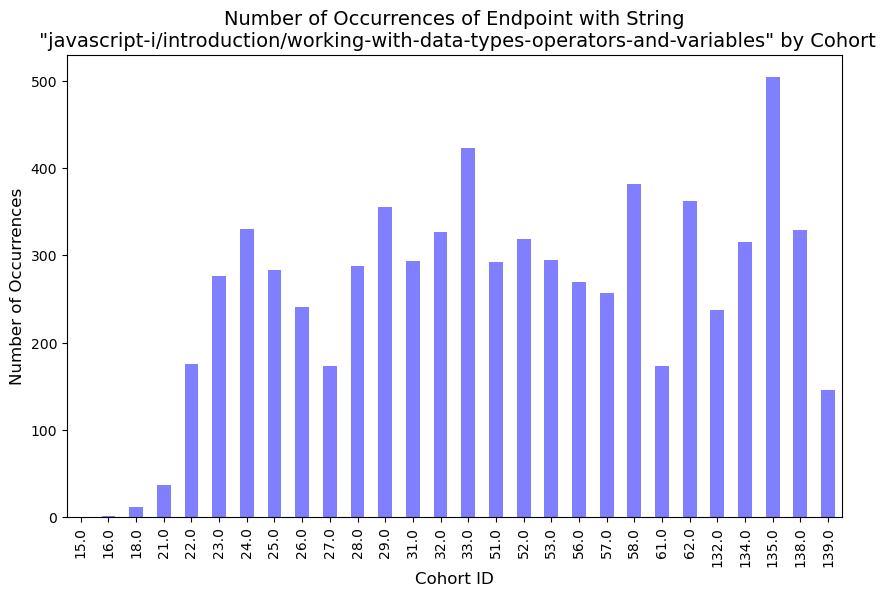

In [14]:
# selected highest hit endpoint to graph by cohort_id
e.plot_endpoints_counts(df2, 'javascript-i/introduction/working-with-data-types-operators-and-variables')


<div class="alert alert-block alert-info">

#### Takeaway
* WebDev 2.0's highest endpoint occurrences is 'javascript i introduction', with over 7,000 hits. It stayed consistent with over 140 hits across for 24 cohorts straight. 

</div>

In [15]:
# look at Data Science highest number of lesson hits
df3['endpoint'].value_counts().head(25)

/                                                    8358
search/search_index.json                             2203
classification/overview                              1785
1-fundamentals/modern-data-scientist.jpg             1655
1-fundamentals/AI-ML-DL-timeline.jpg                 1651
1-fundamentals/1.1-intro-to-data-science             1633
classification/scale_features_or_not.svg             1590
fundamentals/AI-ML-DL-timeline.jpg                   1443
fundamentals/modern-data-scientist.jpg               1438
sql/mysql-overview                                   1424
fundamentals/intro-to-data-science                   1413
6-regression/1-overview                              1124
anomaly-detection/AnomalyDetectionCartoon.jpeg        829
anomaly-detection/overview                            804
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     754
10-anomaly-detection/1-overview                       751
3-sql/1-mysql-overview                                707
1-fundamentals

In [16]:
# get count of hits of highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

cohort_id
34.0       35
55.0      136
59.0     1109
133.0     445
137.0      60
Name: endpoint, dtype: int64

In [17]:
# get count of hits of second highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('1-fundamentals/1.1-intro-to-data-science').sum())

cohort_id
34.0     640
55.0     461
59.0     460
133.0      8
137.0     64
Name: endpoint, dtype: int64

In [18]:
# get count of hits of third highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('sql/mysql-overview').sum())

cohort_id
34.0      27
55.0     125
59.0     774
133.0    295
137.0    203
Name: endpoint, dtype: int64

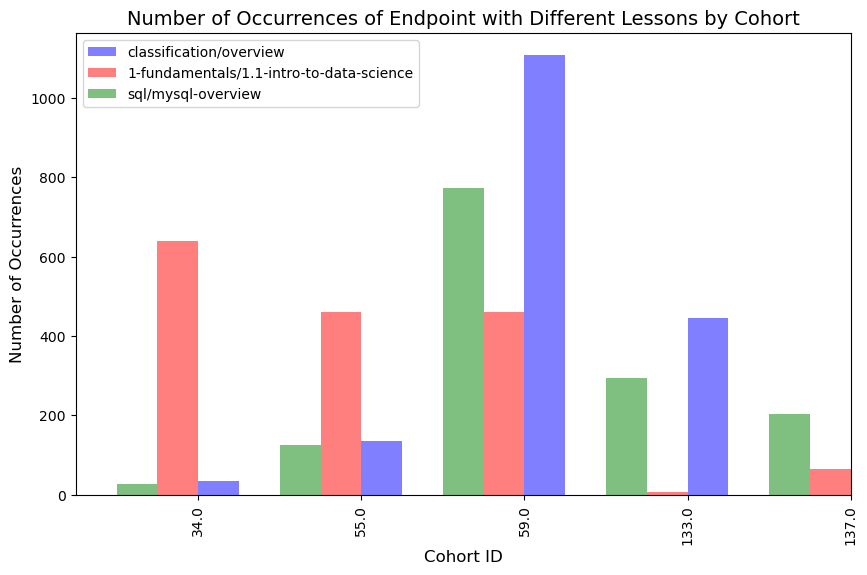

In [19]:
# graph all three lessons for data science broken down by cohorts and compare side by side
e.plot_endpoints_ds(df3)

<div class="alert alert-block alert-info">
    
#### Takeaway
* Data Science 3.0's highest endpoint occurrences is 'sql-mysql' with about 1,424 hits. However, it is important to note that 'sql-mysql' maintained over 100 hits for 4 out of 5 cohorts, but wasn't the highest frequency. Where as the other two lessons charted only had 3 out of 5 cohorts over 100 but had higher frequencies.

</div>

<div class="alert alert-block alert-warning">

### Summarize
* WebDev 1.0's highest endpoint occurrences and most consistent is 'javascript i introduction', with 232 hits. The cohort's consistency never changed between lessons so we selected 'javascript i introduction' as most consistent.
* WebDev 2.0's highest endpoint occurrences and most consistent is 'javascript i introduction', with over 7,000 hits. It stayed consistent with over 140 hits across for 24 cohorts straight.
* Data Science 3.0's most consistent occurrences is 'sql-mysql' with about 1,424 hits. However, it is important to note that 'sql-mysql' maintained over 100 hits for 4 out of 5 cohorts, but wasn't the highest frequency. Where as the other two lessons charted only had 3 out of 5 cohorts over 100 but had higher frequencies.

</div>

## Question 2: Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [20]:
# get count of hits for highest endpoint hits by cohort_id
df1.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/javascript-with-html').sum())

cohort_id
1.0     76
2.0      0
4.0      0
5.0      0
6.0      1
7.0     14
8.0      9
11.0     2
12.0     0
13.0     5
14.0    54
17.0    63
19.0     1
Name: endpoint, dtype: int64

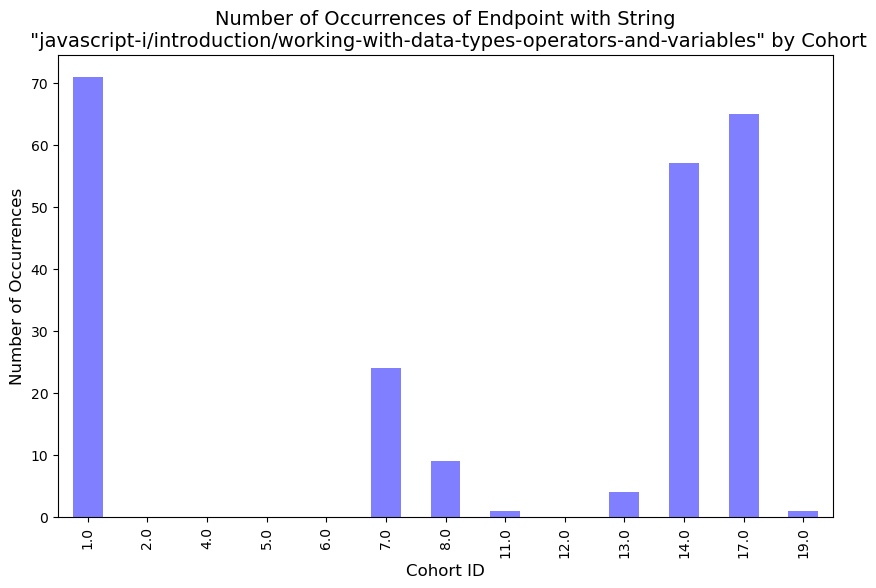

In [21]:
# selected highest hit endpoint to graph by cohort_id
e.plot_endpoints_counts(df1, 'javascript-i/introduction/working-with-data-types-operators-and-variables')

<div class="alert alert-block alert-info">

#### Takeaway
* For WebDev 1.0 cohort 1.0 had 73 occurrences for 'javascript-i intro' while 10 other cohorts had between 0 and 14. 

</div>

In [22]:
# get count of hits of highest endpoint hits by cohort_id
df2.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('javascript-i/introduction/working-with-data-types-operators-and-variables').sum())

cohort_id
15.0       0
16.0       1
18.0      11
21.0      36
22.0     176
23.0     276
24.0     330
25.0     283
26.0     241
27.0     173
28.0     288
29.0     356
31.0     294
32.0     327
33.0     423
51.0     292
52.0     319
53.0     295
56.0     270
57.0     257
58.0     382
61.0     173
62.0     362
132.0    237
134.0    315
135.0    505
138.0    329
139.0    146
Name: endpoint, dtype: int64

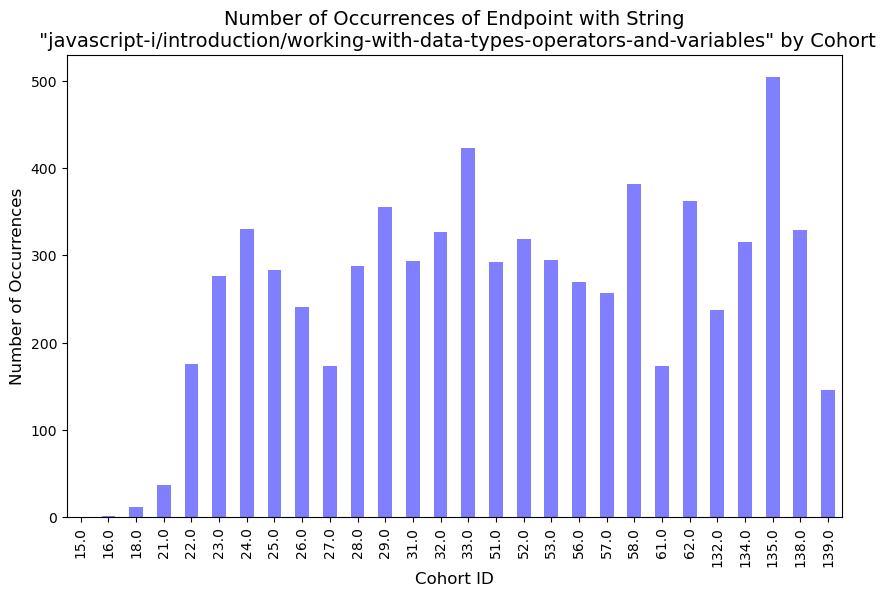

In [23]:
# selected highest hit endpoint to graph by cohort_id
e.plot_endpoints_counts(df2, 'javascript-i/introduction/working-with-data-types-operators-and-variables')


<div class="alert alert-block alert-info">

#### Takeaway
* For WebDev 2.0 cohort 135.0 had 505 occurrences for 'javascript-i intro' while 18 other cohorts had between 0 and 300. 

</div>

In [24]:
# get count of hits of highest endpoint hits by cohort_id
df3.groupby('cohort_id')['endpoint'].apply(lambda x: x.str.contains('classification/overview').sum())

cohort_id
34.0       35
55.0      136
59.0     1109
133.0     445
137.0      60
Name: endpoint, dtype: int64

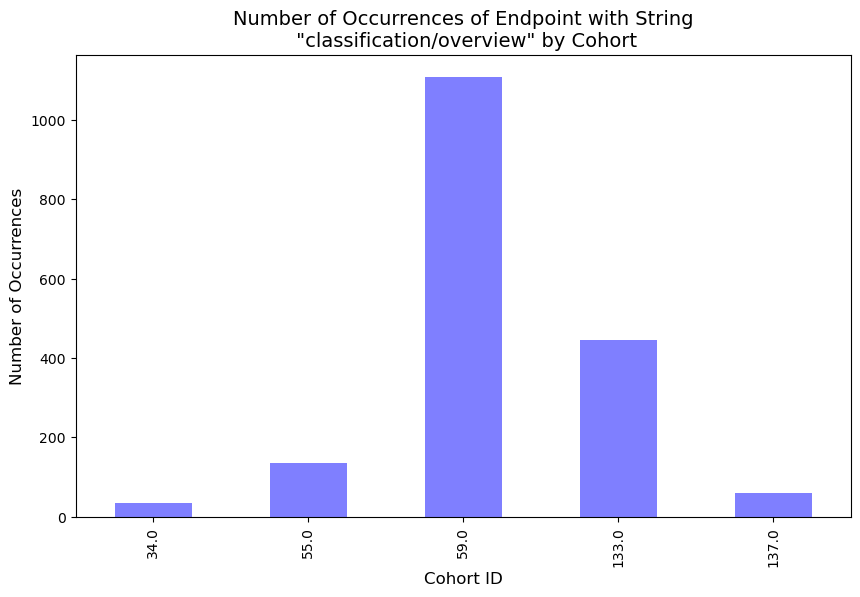

In [25]:
# selected highest hit endpoint to graph by cohort_id
e.plot_endpoints_counts(df3, 'classification/overview')

<div class="alert alert-block alert-info">

#### Takeaway
* For Data Science 3.0 cohort 59.0 had 1109 occurrences for 'classification-overview' while the 4 other cohorts had between 0 and 445. 

</div>

<div class="alert alert-block alert-warning">

### Summarize
* For WebDev 1.0 cohort 1.0 had 73 occurrences for 'javascript-i intro' while 10 other cohorts had between 0 and 14.
* For WebDev 2.0 cohort 135.0 had 505 occurrences for 'javascript-i intro' while 18 other cohorts had between 0 and 300. 
* For Data Science 3.0 cohort 59.0 had 1109 occurrences for 'classification-overview' while the 4 other cohorts had between 0 and 445. 

</div>

## Question 3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<div class="alert alert-block alert-warning">

# summarize...

</div>

## Question 4: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

<div class="alert alert-block alert-warning">

# summarize...

</div>

## Question 5: Which lessons are least accessed?

<div class="alert alert-block alert-warning">

# summarize...

</div>

## Exploration Summary
*
*
*
*

# Conclusions
*
*
*
*

# Recommendations
*
*